# Problem 3 (Hopfield Network)

# Import libraries

In [139]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## Hopfield network class

In [140]:
class HopfieldNetwork:

  def __init__(self, patterns):
    self.memory = patterns
    self.nodes_count = len(self.memory[0].flatten())
    self.weights = np.zeros((self.nodes_count, self.nodes_count))
    self.weight_matrix_initialization(patterns)
    self.treshold = 0

  def weight_matrix_initialization(self, patterns): 
    for pattern in patterns:
      flatten_pattern = pattern.reshape((1, self.nodes_count))
      self.weights += np.dot(np.transpose(flatten_pattern), flatten_pattern)
    for i in range(self.nodes_count):
      self.weights[i][i] = 0
  
  def predict(self, pattern):
    seen_patterns = set()
    flatten_pattern = pattern.flatten()
    self.result = flatten_pattern
    result_size = len(self.result)
    self.result_in = np.zeros(result_size)

    while True:
      nodes_order = np.random.permutation(result_size)
      for node in nodes_order:
        self.result_in[node] = flatten_pattern[node] + np.dot(self.result, self.weights[:, node])
        self.result[self.result_in > self.treshold] = 1
        self.result[self.result_in < self.treshold] = -1
      
      if tuple(self.result) in seen_patterns:
        print('See old pattern... No memory :(')
        return self.result.reshape((self.memory[0].shape[0], self.memory[0].shape[1])), False
      
      for memorise_pattern in self.memory:
        if (memorise_pattern.flatten() == self.result).all():
          print('I remember =))')
          return memorise_pattern, True
      
      seen_patterns.add(tuple(self.result))

### Show matrix function

In [141]:
def show_result(matrix, pattern_found=None):
  if pattern_found is not None:
    if not pattern_found:
      print("Best achieved:")
    else:
      print("Result:")
  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if matrix[i][j] == 1:
        print("#", end="")
      else:
        print("-", end="")
    print("")
  print("___________________________")

## Test pure patterns

In [142]:
zero_pattern = np.array([[1,1, 1, 1, 1, 1,1,1],
                         [1,1, 1, 1, 1, 1,1,1],
                         [1,1,-1,-1,-1,-1,1,1],
                         [1,1,-1,-1,-1,-1,1,1],
                         [1,1,-1,-1,-1,-1,1,1],
                         [1,1,-1,-1,-1,-1,1,1],
                         [1,1, 1, 1, 1, 1,1,1],
                         [1,1, 1, 1, 1, 1,1,1]])
one_pattern = np.array([[-1,-1, 1,1,1,-1,-1,-1],
                        [-1,-1, 1,1,1,-1,-1,-1],
                        [-1,-1,-1,1,1,-1,-1,-1],
                        [-1,-1,-1,1,1,-1,-1,-1],
                        [-1,-1,-1,1,1,-1,-1,-1],
                        [-1,-1,-1,1,1,-1,-1,-1],
                        [-1,-1,-1,1,1,-1,-1,-1],
                        [-1,-1,-1,1,1,-1,-1,-1]])
patterns = np.array([zero_pattern, one_pattern])
hopfield = HopfieldNetwork(patterns)

zero_result, pattern_found = hopfield.predict(zero_pattern)
show_result(zero_result, pattern_found)

one_result, pattern_found = hopfield.predict(one_pattern)
show_result(one_result, pattern_found)

I remember =))
Result:
########
########
##----##
##----##
##----##
##----##
########
########
___________________________
I remember =))
Result:
--###---
--###---
---##---
---##---
---##---
---##---
---##---
---##---
___________________________


## Add noise and test network again



### Add noise function

In [143]:
def add_noise(pattern, noise_percentage=0.3):
  noisy_pattern = np.copy(pattern)
  pattern_cells = len(pattern.flatten())
  mistaken_cells_count = math.floor(noise_percentage * pattern_cells)
  to_change_indices = random.sample(range(pattern_cells), mistaken_cells_count)
  for index in to_change_indices:
    to_change_row = index // noisy_pattern.shape[1]
    to_change_col = index % noisy_pattern.shape[1]
    noisy_pattern[to_change_row][to_change_col] *= -1
  return noisy_pattern

### Test network against 30% noise

In [144]:
noisy_zero = add_noise(zero_pattern)
show_result(noisy_zero)
print("|||||||")
print("vvvvvvv")
noisy_zero_result, pattern_found = hopfield.predict(noisy_zero)
show_result(noisy_zero_result, pattern_found)

noisy_one = add_noise(one_pattern)
show_result(noisy_one)
print("|||||||")
print("vvvvvvv")
noisy_one_result, pattern_found = hopfield.predict(noisy_one)
show_result(noisy_one_result, pattern_found)

-######-
##-#-##-
##---##-
-##-#-##
-#---##-
##--#-##
--#-##-#
#-######
___________________________
|||||||
vvvvvvv
I remember =))
Result:
########
########
##----##
##----##
##----##
##----##
########
########
___________________________
---#-#--
--#-----
--#-#--#
-##-##-#
----##--
----#---
----#---
-####---
___________________________
|||||||
vvvvvvv
I remember =))
Result:
--###---
--###---
---##---
---##---
---##---
---##---
---##---
---##---
___________________________


## Plot result hamming distance against noise

### Hamming distance funciton

In [145]:
def hamming_distance(pattern_1, pattern_2):
  return np.count_nonzero(pattern_1 != pattern_2)

### Plot result

I remember =))
I remember =))
I remember =))
I remember =))
I remember =))
I remember =))
I remember =))
I remember =))
I remember =))
I remember =))
See old pattern... No memory :(
I remember =))
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(
See old pattern... No memory :(


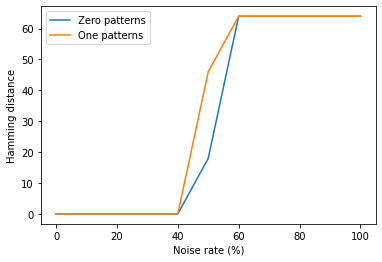

In [146]:
noises = range(0, 101, 10)
zero_hammings = []
one_hammings = []
for noise in noises:
  noise /= 100
  noisy_zero = add_noise(zero_pattern, noise)
  noisy_zero_result, _ = hopfield.predict(noisy_zero)
  hamming_d = hamming_distance(noisy_zero_result, zero_pattern)
  zero_hammings.append(hamming_d)

  noisy_one = add_noise(one_pattern, noise)
  noisy_one_result, _ = hopfield.predict(noisy_one)
  hamming_d = hamming_distance(noisy_one_result, one_pattern)
  one_hammings.append(hamming_d)
  
plt.plot(noises, zero_hammings, label="Zero patterns")
plt.plot(noises, one_hammings, label="One patterns")
plt.xlabel("Noise rate (%)")
plt.ylabel("Hamming distance")
plt.legend()
plt.show()